# Classification

##### MNIST dataset - consist of handwritten digits . It is the hello world dataset of machine learning used for classification


In [2]:
# import dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)




In [17]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [32]:
#visualizing the image using matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[5].values

In [33]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
        25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [34]:
some_digit_image = some_digit.reshape(28,28)

In [35]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

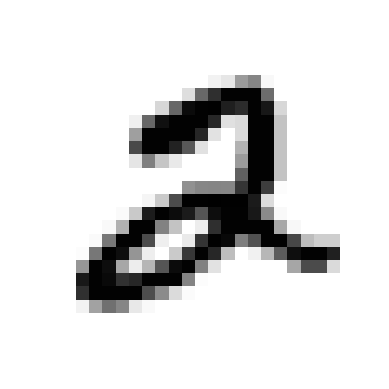

In [37]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [54]:
y.iloc[:1].values

['5']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Training a Binary Classifier

In [55]:
#split the training and testing data

trainX = X.iloc[:60000].values
trainY = y.iloc[:60000].values
testX = X.iloc[10000:].values
testY = y.iloc[10000:].values
trainY = trainY.astype(int)
trainX = trainX.astype(int)

#dividng the y values into 2 classes 5 or not 5 - earlier there were total 10 classes (0-9)
train_y_5 = (trainY==5)
test_y_5 = (testY==5)



#### Schrocastic Gradient Descent classifier

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_classf = SGDClassifier(random_state=42)
sgd_classf.fit(trainX,train_y_5)


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


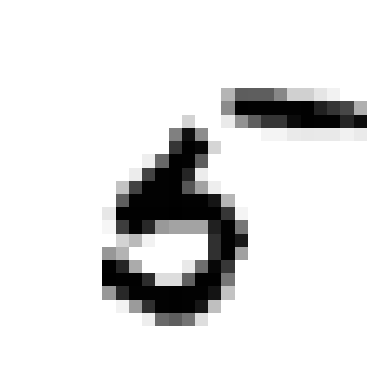

In [98]:
#testing the classifier
test_image = testX[15]

image = test_image.reshape(28,28)
plt.imshow(image,cmap="binary")
plt.axis("off")
plt.show()



In [97]:
sgd_classf.predict([testX[15]])


array([ True])

#### Performance Measures

##### 1. Confusion Matrix

In [79]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_classf,trainX,train_y_5,cv=3)


In [80]:
#confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [83]:
#calculating Precison and Recall for classifier and F1 Score
from sklearn.metrics import precision_score,recall_score,f1_score


print("Precision Score:",precision_score(train_y_5,y_train_predict))
print("Recall Score:",recall_score(train_y_5,y_train_predict))
print("F1 Score:",f1_score(train_y_5,y_train_predict))


Precision Score: 0.8370879772350012
Recall Score: 0.6511713705958311
F1 Score: 0.7325171197343847


### Multiclass Classification

In [87]:
from sklearn.svm import SVC
trainX = X.iloc[:60000].values
trainY = y.iloc[:60000].values
svm_clf = SVC()

svm_clf.fit(trainX,trainY)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [99]:
svm_clf.predict([trainX[15]])

array(['7'], dtype=object)